In [1]:
#Output variable -> y
#y -> Whether the client has subscribed a term deposit or not
# Binomial ("yes" or "no")

#uploading the bank-full file
# prompt: import the data file using collab

from google.colab import files

uploaded = files.upload()



Saving bank-full.csv to bank-full.csv


In [3]:
# prompt: give me code to import the csv file
import numpy as np
import pandas as pd

df = pd.read_csv('bank-full.csv',sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


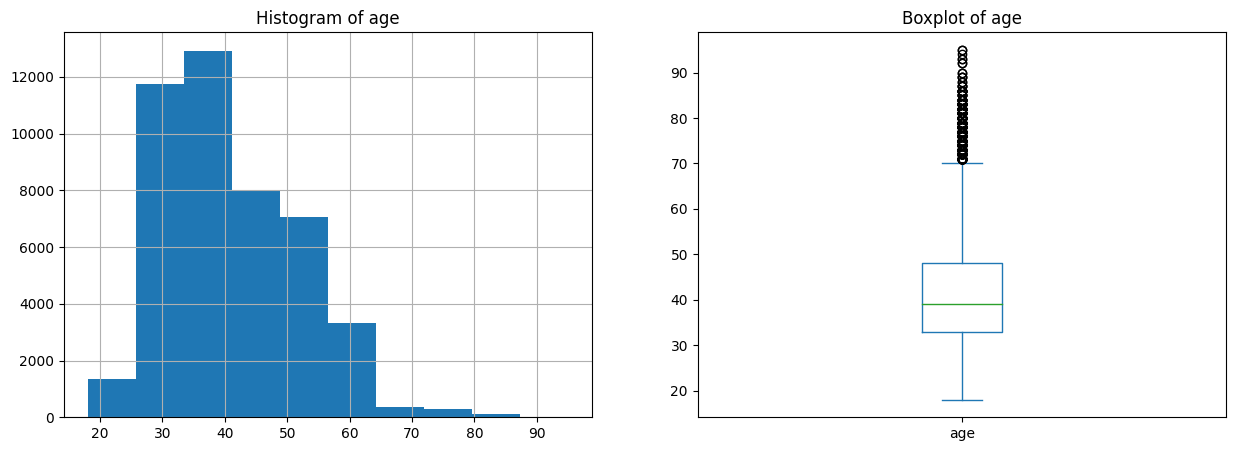

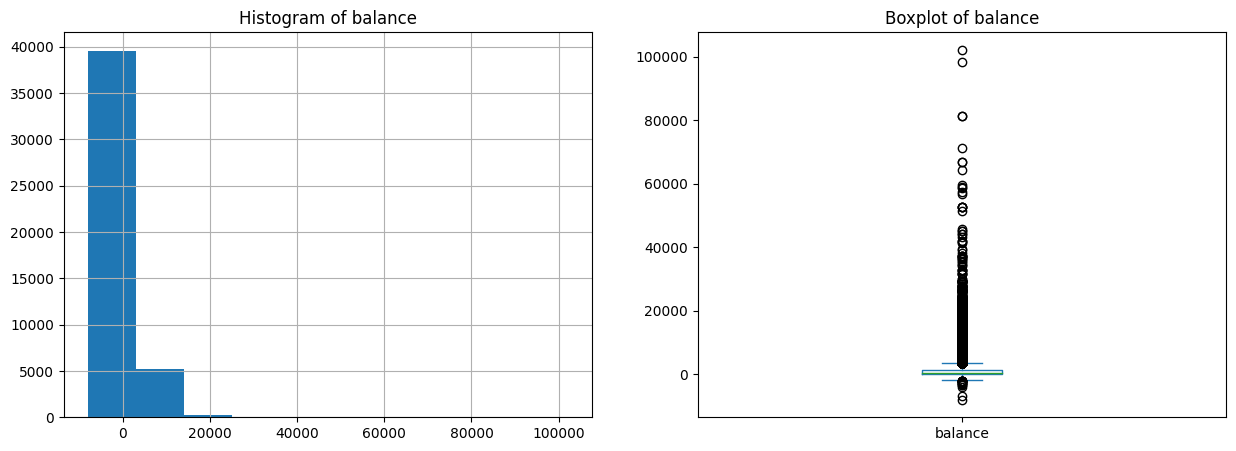

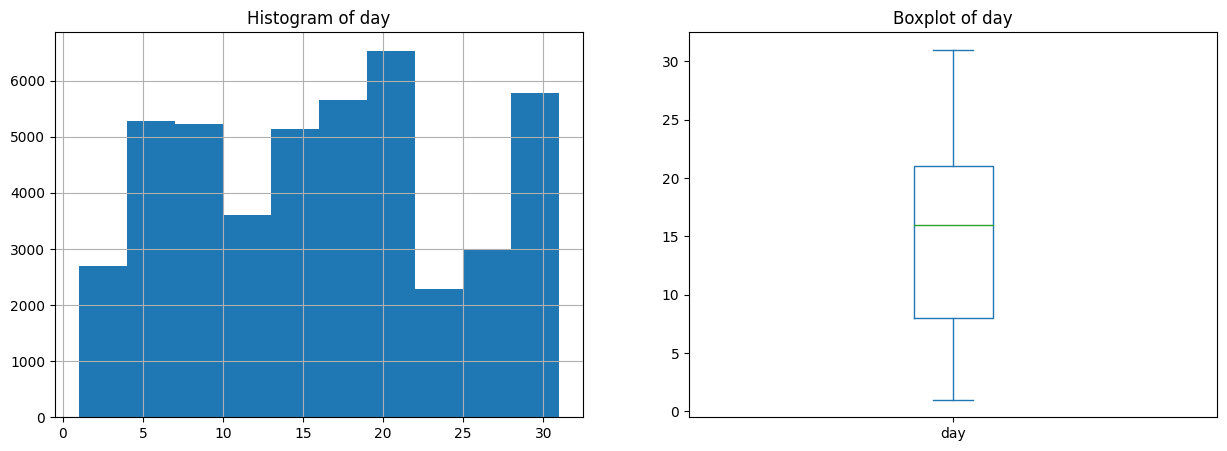

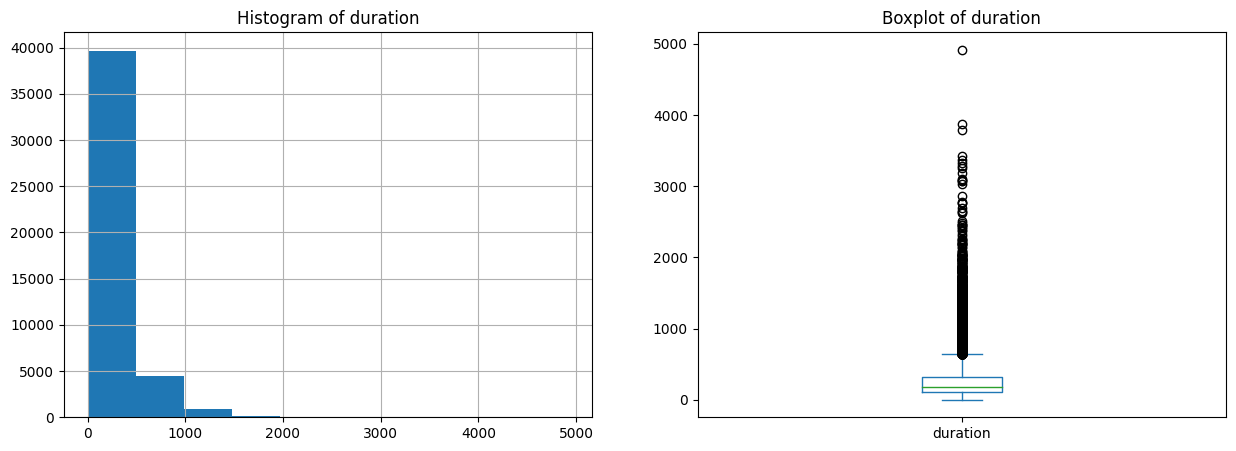

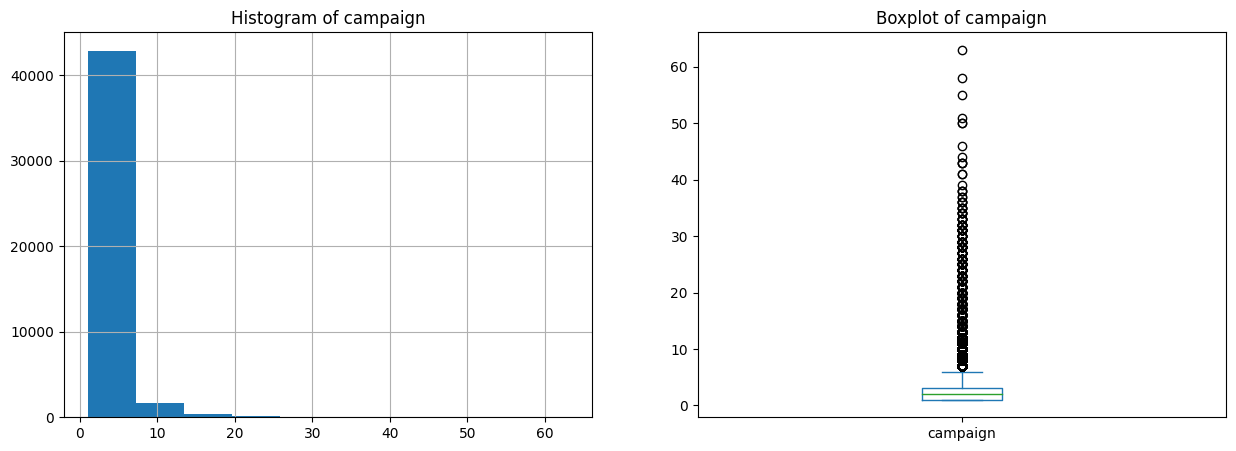

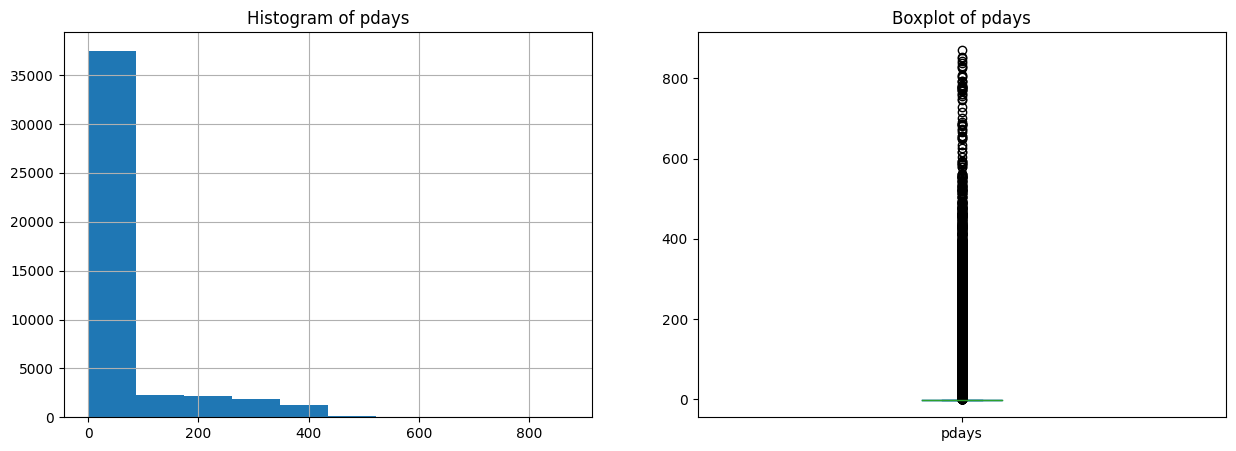

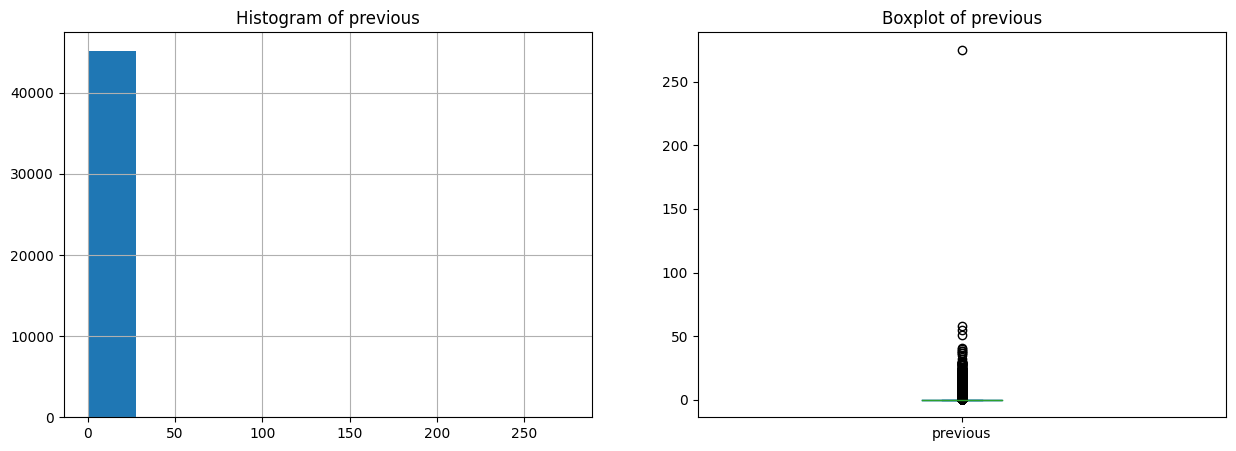

In [9]:


for column in list(df):
    if df[column].dtype == 'int64':
        # Create a figure with two subplots
        plt.figure(figsize=(15, 5))

        # First subplot: histogram
        plt.subplot(1, 2, 1)
        df[column].hist()
        plt.title(f'Histogram of {column}')

        # Second subplot: boxplot
        plt.subplot(1, 2, 2)
        df[column].plot(kind='box')
        plt.title(f'Boxplot of {column}')

        # Show the plot
        plt.show()


In [10]:
# prompt: I want label encoding for the object datatype only

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in list(df):
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
y=df['y']
x=df.iloc[:, 0:16]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [12]:
df.shape

(45211, 17)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [15]:
#modelfitting
logreg.fit(x,y)
#bo
print("Intercept value:", logreg.intercept_)
#b1
print("coefficient value", logreg.coef_)


Intercept value: [-0.07052832]
coefficient value [[-3.16927654e-02  1.45940589e-02 -9.21323098e-02 -1.31764472e-02
  -4.79434706e-03  4.00428561e-05 -1.81623436e-01 -5.35131143e-02
  -1.86772854e-01 -8.42355503e-03 -5.99403301e-02  3.27148816e-03
  -2.67073009e-01 -1.23720685e-03  1.20010031e-01 -1.80593800e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = logreg.predict(x)
CM = confusion_matrix(y,Y_pred)
CM

array([[39279,   643],
       [ 4437,   852]])

In [18]:
ac = accuracy_score(y, Y_pred)
print("Accuracy score", ac.round(3))

Accuracy score 0.888


In [19]:
from sklearn.metrics import recall_score, precision_score,f1_score
rs = recall_score(y, Y_pred)
print("sensitvity", rs.round(3))
ps = precision_score(y, Y_pred)
print("precision_score", ps.round(3))
f1 = f1_score(y, Y_pred)
print("f1_score", f1.round(3))

sensitvity 0.161
precision_score 0.57
f1_score 0.251


In [20]:
CM
TN = CM[0,0]
FP= CM[1,0]
Specificity= TN/(TN+FP)
print("Specificityscore", Specificity.round(2))

Specificityscore 0.9


In [21]:
df['Y_prob']= logreg.predict_proba(x)[:,1]

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Y_prob
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0.051487
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0.051155
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0.053064
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0.039154
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0.096681


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,NA=roc_curve(y,df['Y_prob'])

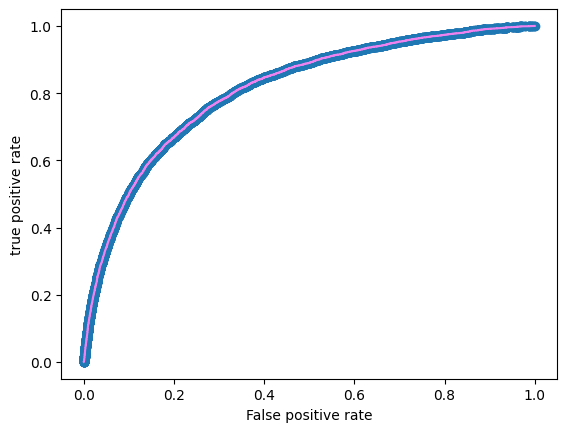

In [24]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='violet')
plt.xlabel("False positive rate")
plt.ylabel('true positive rate')
plt.show()

In [25]:
print("Area under curve score:", roc_auc_score(y,df["Y_prob"]).round(3))

Area under curve score: 0.811
